In [218]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
from sympy.plotting import plot as syplt
from autograd import grad
import autograd.numpy as anp
from autograd import elementwise_grad
from autograd import jacobian as jac

# Problem1

In [222]:
x=sy.symbols('x')
f=lambda x: (sy.sin(x)+1)**(sy.sin(sy.cos(x)))
fprime=lambda x: sy.diff(f(x),x)

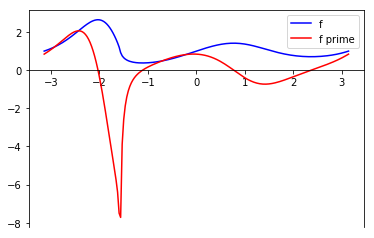

In [87]:
lam_f=sy.lambdify(x,f(x), 'numpy')
lam_fprime=sy.lambdify(x, fprime(x), 'numpy')
y=np.linspace(-np.pi,np.pi,200, dtype=float)
plt.plot(y,lam_f(y),'b-',label='f')
plt.plot(y,lam_fprime(y),'r-', label='f prime')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.legend()
plt.show()

# Problem 2

In [89]:
def forward1(f,x,h):
    return (f(x+h)-f(x))/h
def forward2(f,x,h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
def backward1(f,x,h):
    return (f(x)-f(x-h))/h
def backward2(f,x,h):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)
def centered2(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)
def centered4(f,x,h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)

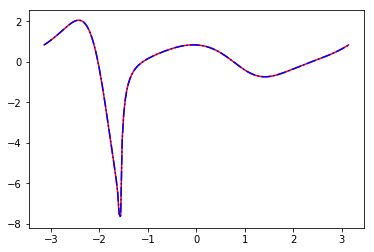

In [92]:
h=1e-3
plt.plot(y,forward1(lam_f,y,h),'r-')
plt.plot(y, forward2(lam_f,y,h),'b-.')
plt.show()

# Problem 3

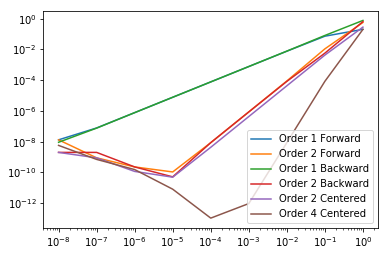

In [100]:
def deriv(x):
    h=np.logspace(-8,0,9)
    c=lam_fprime(x)
    plt.loglog(h,abs(c-forward1(lam_f,x,h)), label='Order 1 Forward')
    plt.loglog(h, abs(c-forward2(lam_f,x,h)), label='Order 2 Forward')
    plt.loglog(h, abs(c-backward1(lam_f,x,h)), label='Order 1 Backward')
    plt.loglog(h, abs(c-backward2(lam_f,x,h)), label='Order 2 Backward')
    plt.loglog(h, abs(c-centered2(lam_f,x,h)), label='Order 2 Centered')
    plt.loglog(h, abs(c-centered4(lam_f,x,h)), label='Order 4 Centered')
    plt.legend()
    return plt.show()
deriv(1)             

# Problem 4

In [118]:
plane=np.load('plane.npy')

In [150]:
a=500
tanbeta=np.tan(np.deg2rad(plane[:,2]))
tanalpha=np.tan(np.deg2rad(plane[:,1]))
x=a*(tanbeta/(tanbeta-tanalpha))
y=a*((tanbeta*tanalpha)/(tanbeta-tanalpha))
def funcx(t):
    if t in range(7,15,1):
        return x[t-7]
    else:
        return '.'
def funcy(t):
    if t in range(7,15,1):
        return y[t-7]
    else:
        return '.'
def xprime(t):
    if t==7:
        return forward1(funcx,t,1)
    if t in range(8,14,1):
        return centered2(funcx,t,1)
    if t==14:
        return backward1(funcx,t,1)
    else:
        return '.'
def yprime(t):
    if t==7:
        return forward1(funcy,t,1)
    if t in range(8,14,1):
        return centered2(funcy,t,1)
    if t==14:
        return backward1(funcy,t,1)
    else:
        return '.'

In [152]:
for t in range(7,15,1):
    print('Speed at time',t,'=',np.sqrt(xprime(t)**2+yprime(t)**2))

Speed at time 7 = 46.4242006221
Speed at time 8 = 47.001039381
Speed at time 9 = 48.9988051404
Speed at time 10 = 50.0994416297
Speed at time 11 = 48.2903508382
Speed at time 12 = 51.5645590493
Speed at time 13 = 53.9230335451
Speed at time 14 = 51.5148005696


# Problem 5

In [155]:
def jacobian(f, x, h):
    n=len(x)
    m=len(f(x))
    J=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            e=np.zeros(n)
            e[j]=1
            J[i,j]=(f(x+h*e)[i]-f(x-h*e)[i])/(2*h)
    return J

In [162]:
def testf(X):
    return np.array([(X[0])**2,(X[0])**3-X[1]])

In [165]:
X=np.array([1,1])
jacobian(testf,X,1e-3)

array([[ 2.      ,  0.      ],
       [ 3.000001, -1.      ]])

# Problem 6

In [196]:
fsy = lambda x: sy.log(sy.sqrt(sy.sin(sy.sqrt(x))))
fauto=lambda x: anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))
fnp=lambda x: np.log(np.sqrt(np.sin(np.sqrt(x))))
grad_fauto=grad(fauto)

In [197]:
x=sy.symbols('x')
fprime_sy= lambda x: sy.diff(fsy(x),x)
lam_fprime_sy=lambdify(x,fprime_sy(x),'numpy')
lam_fprime_sy(np.pi/4), grad_fauto(anp.pi/4), (fnp(np.pi/4+1e-3)-fnp(np.pi/4-1e-3))/(2e-3)


(0.2302590111469609, 0.23025901114696085, 0.23025918292982062)

# Problem 7

In [198]:
def taylor_sin(x,tol=1e-6):
    result=0
    cur_term=x
    i=0
    while abs(cur_term)>=tol:
        cur_term=(-1)**i*(x**(2*i+1))/np.math.factorial(2*i+1)
        result+=cur_term
        i+=1
    return result

In [199]:
d_taylor_sin=grad(taylor_sin)
d2_taylor_sin=grad(d_taylor_sin)

In [213]:
u=np.linspace(-np.pi,np.pi,200)
dsin=np.empty_like(u)
d2sin=np.empty_like(u)
for i in range(len(u)):
    dsin[i]=float(d_taylor_sin(u[i]))
    d2sin[i]=float(d2_taylor_sin(u[i]))


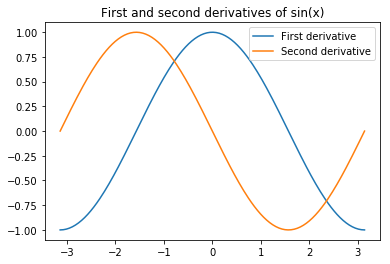

In [216]:
plt.plot(u, dsin, label='First derivative')
plt.plot(u, d2sin, label='Second derivative')
plt.title('First and second derivatives of sin(x)')
plt.legend()
plt.show()

# Problem 8

In [219]:
def prob8(x):
    return anp.array([anp.exp(x[0])*anp.sin(x[1])+x[1]**3, 3*x[1]-anp.cos(x[0])])

In [223]:
Y=anp.array([1.,1.])
jacobian8=jac(prob8)
jacobian8(Y)

array([[ 2.28735529,  4.46869394],
       [ 0.84147098,  3.        ]])